In [1]:
import keras
from keras import layers

4. Use Autoencoder to implement anomaly detection. Build the model by using:

a. Import required libraries

b. Upload / access the dataset

c. Encoder converts it into latent representation

d. Decoder networks convert it back to the original input

e. Compile the models with Optimizer, Loss, and Evaluation Metrics
**********************************************************************
## Autoencoder
An autoencoder is a type of artificial neural network used in unsupervised learning and dimensionality reduction. It's designed to encode and then decode data, often used for tasks like data compression, denoising, and feature learning. Here's how it works:

* Encoder: The first part of the autoencoder, called the encoder, takes input data and compresses it into a lower-dimensional representation. This lower-dimensional representation is sometimes referred to as the "encoding" or "latent space." The encoder consists of one or more layers of neurons that learn to capture the most important features or patterns in the input data.

* Decoder: The second part of the autoencoder, called the decoder, takes the encoded representation and attempts to reconstruct the original data from it. Like the encoder, the decoder consists of one or more layers that learn to convert the encoded data back into the original format.

The goal of an autoencoder is to learn a compact representation of the input data in the encoding step and then learn to reconstruct the original data from this compact representation in the decoding step. During training, the autoencoder's parameters (weights) are adjusted to minimize the difference between the input data and the reconstructed data.

In [2]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


In [3]:
# This is our input image
input_img = keras.Input(shape=(784,))

So, the purpose of this line is to create a dense layer with encoding_dim neurons, using the ReLU activation function, and connect it to the input_img, forming a part of a neural network model.

In [4]:
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

So, the purpose of this line is to create a dense layer with 784 neurons, using the sigmoid activation function, and connect it to the encoded layer. This is commonly used in autoencoders to decode the reduced-dimensional representation (encoding) back into the original data space, such as image reconstruction.

In [5]:
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In summary, autoencoder = keras.Model(input_img, decoded) is used to create a Keras model that defines the architecture of your autoencoder, allowing you to train, evaluate, and use it for various tasks related to encoding and decoding data.

In [6]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.layers

In simpler words, this model is used to extract a compressed, simplified representation of your input data. It's like creating a "data compressor" that can take in your data and reduce it to a more compact form, which can be useful for tasks like data compression, feature extraction, or dimensionality reduction.

In [7]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

The line encoded_input = keras.Input(shape=(encoding_dim,)) creates an input layer for your neural network model with a specific shape.

In [8]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

In [9]:
# Retrieve the last layer of the autoencoder model (output layer)
decoder_layer = autoencoder.layers[-1]


In [10]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Now let's train our autoencoder to reconstruct MNIST digits.

First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

The binary_crossentropy function is typically used in the context of binary classification tasks in machine learning and deep learning. In simple words, it's a way to measure how well a model is performing when it needs to decide between two choices, often denoted as "0" and "1," "yes" and "no," or "positive" and "negative."

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Now let's train our autoencoder for 50 epochs:

In [14]:
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/40
235/235 [==============================] - 4s 15ms/step - loss: 0.2762 - val_loss: 0.1887
Epoch 2/40
235/235 [==============================] - 3s 12ms/step - loss: 0.1708 - val_loss: 0.1537
Epoch 3/40
235/235 [==============================] - 3s 11ms/step - loss: 0.1444 - val_loss: 0.1335
Epoch 4/40
235/235 [==============================] - 3s 11ms/step - loss: 0.1285 - val_loss: 0.1216
Epoch 5/40
235/235 [==============================] - 3s 11ms/step - loss: 0.1188 - val_loss: 0.1138
Epoch 6/40
235/235 [==============================] - 3s 15ms/step - loss: 0.1120 - val_loss: 0.1083
Epoch 7/40
235/235 [==============================] - 3s 11ms/step - loss: 0.1069 - val_loss: 0.1036
Epoch 8/40
235/235 [==============================] - 3s 11ms/step - loss: 0.1030 - val_loss: 0.1002
Epoch 9/40
235/235 [==============================] - 3s 11ms/step - loss: 0.1000 - val_loss: 0.0976
Epoch 10/40
235/235 [==============================] - 3s 14ms/step - loss: 0.0978 - val_lo

After 40 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.


In short, an 'encoder' is a component in machine learning used to convert input data (e.g., text, images, or numerical values) into a different representation, typically a numerical one. It's often used in various tasks like data compression, feature extraction, and creating embeddings for downstream applications.

In short, a 'decoder' is a component in machine learning used to convert a hidden representation or encoded data back into a more understandable or original format. It's commonly used in tasks like language translation, image generation, and sequence-to-sequence tasks.

In [15]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


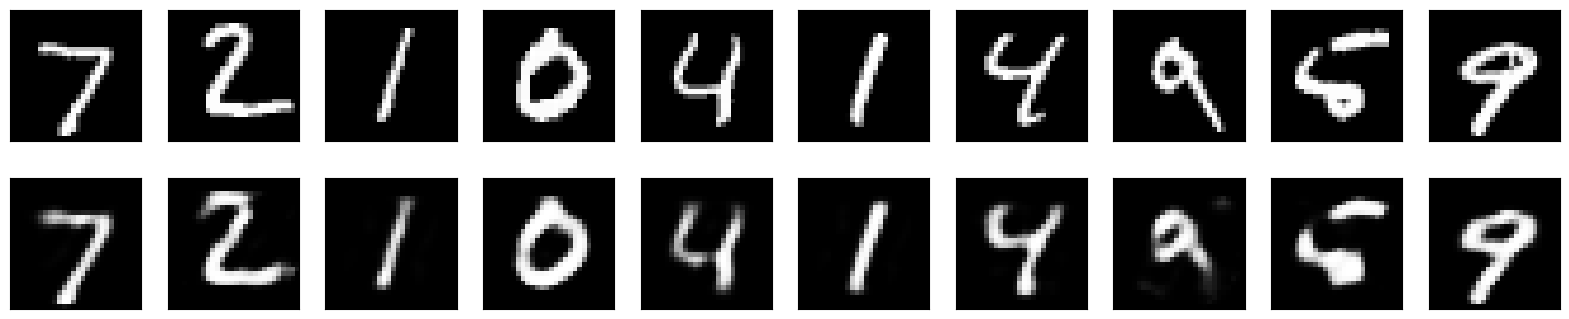

In [16]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.